In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import pandas as pd
#hahatry = pd.read_csv(data_directory)
#hahatry.head(3)
#def show_example(df, num):
#    print('expression: ' ,df.iloc[num] )
#    image = np.array([[int(i) for i in x.split()] for x in df.loc[num, ['pixels']]])
#    print(image.shape)
#    image = image.reshape(48,48)
#    plt.imshow(image, interpolation='nearest', cmap='gray')
#    plt.show()
#show_example(hahatry,0)

# Data Load

In [2]:
import numpy as np

def load_data(filename):
  data_file = open(filename, 'r')  # Open File "to read"
  data_image = []  # List to hold Datapoint objects
  data_label = []
  for index, line in enumerate(data_file):
    if index!=0:
      label_tep,image_tep = line.split(',')
      image_tep = image_tep.split(' ')
      image_tep = list(np.int_(image_tep))
      data_label.append(int(label_tep))
      data_image.append(image_tep)
  image = np.array(data_image).reshape([-1,48,48])
  return np.array(data_label),image

In [3]:
test_data = ("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/Q2_Test_Data.csv")
train_data = ("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/Q2_Train_Data.csv")
valid_data = ("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/Q2_Validation_Data.csv")
test_labels,test_images = load_data(test_data)
train_labels,train_images = load_data(train_data)
valid_labels,valid_images = load_data(valid_data)

# 2(a)

Train Image Shape:  (28709, 48, 48) Train Label Shape:  (28709,)
Valid Image Shape:  (3589, 48, 48) Valid Label Shape:  (3589,)
Test Image Shape:  (3589, 48, 48) Test Label Shape:  (3589,)


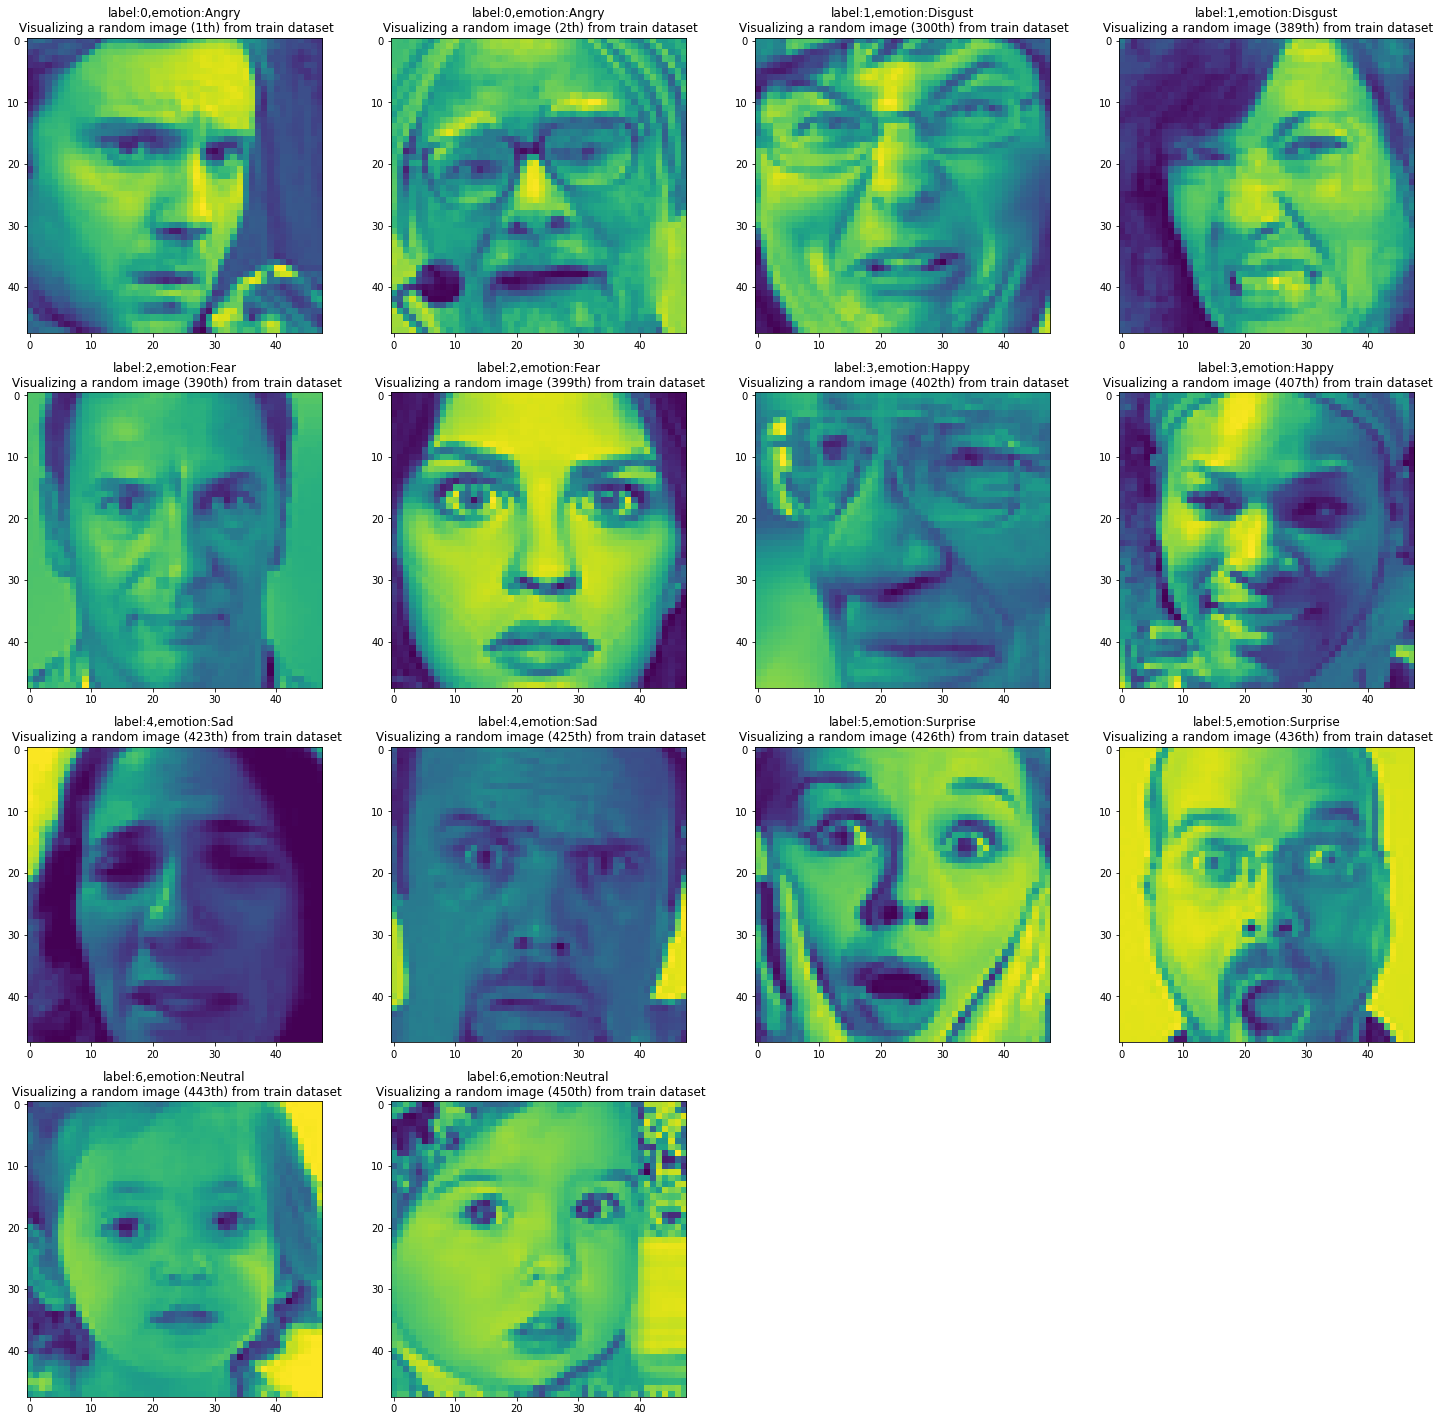

In [4]:
import warnings
warnings.filterwarnings("ignore")
#from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

labelMap = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

# Check number of samples (28709 in training, 3589 in valid and 3589 in test)
# Each image has 28 x 28 pixels
print("Train Image Shape: ", train_images.shape, "Train Label Shape: ", train_labels.shape)
print("Valid Image Shape: ", valid_images.shape, "Valid Label Shape: ", valid_labels.shape)  
print("Test Image Shape: ", test_images.shape, "Test Label Shape: ", test_labels.shape) 


def funcPlot(images_set,labels_set,dataName):
  fig = plt.figure(figsize=[25,25])
  index = 0
  plot_num = 0
  for i in range(len(images_set)):
    if labels_set[i] == index:
      a = fig.add_subplot(4,4,plot_num+1)
      _ = plt.imshow(images_set[i])
      a.set_title("label:{},emotion:{}\n Visualizing a random image ({}th) from {} dataset".format(
          labels_set[i],labelMap[labels_set[i]],i+1,dataName))
      plot_num +=1
      if plot_num%2 ==0:
        index +=1
    if index ==7:
      break
  plt.show()
funcPlot(train_images,train_labels,'train')

# 2(b)

In [5]:
num_emotion = []
for i in range(7):
  num_tep = np.count_nonzero(train_labels==i)
  num_emotion.append(num_tep)
  print(i,labelMap[i],num_tep)
print(len(train_labels),sum(num_emotion))

0 Angry 3995
1 Disgust 436
2 Fear 4097
3 Happy 7215
4 Sad 4830
5 Surprise 3171
6 Neutral 4965
28709 28709


# Data Preprocessing

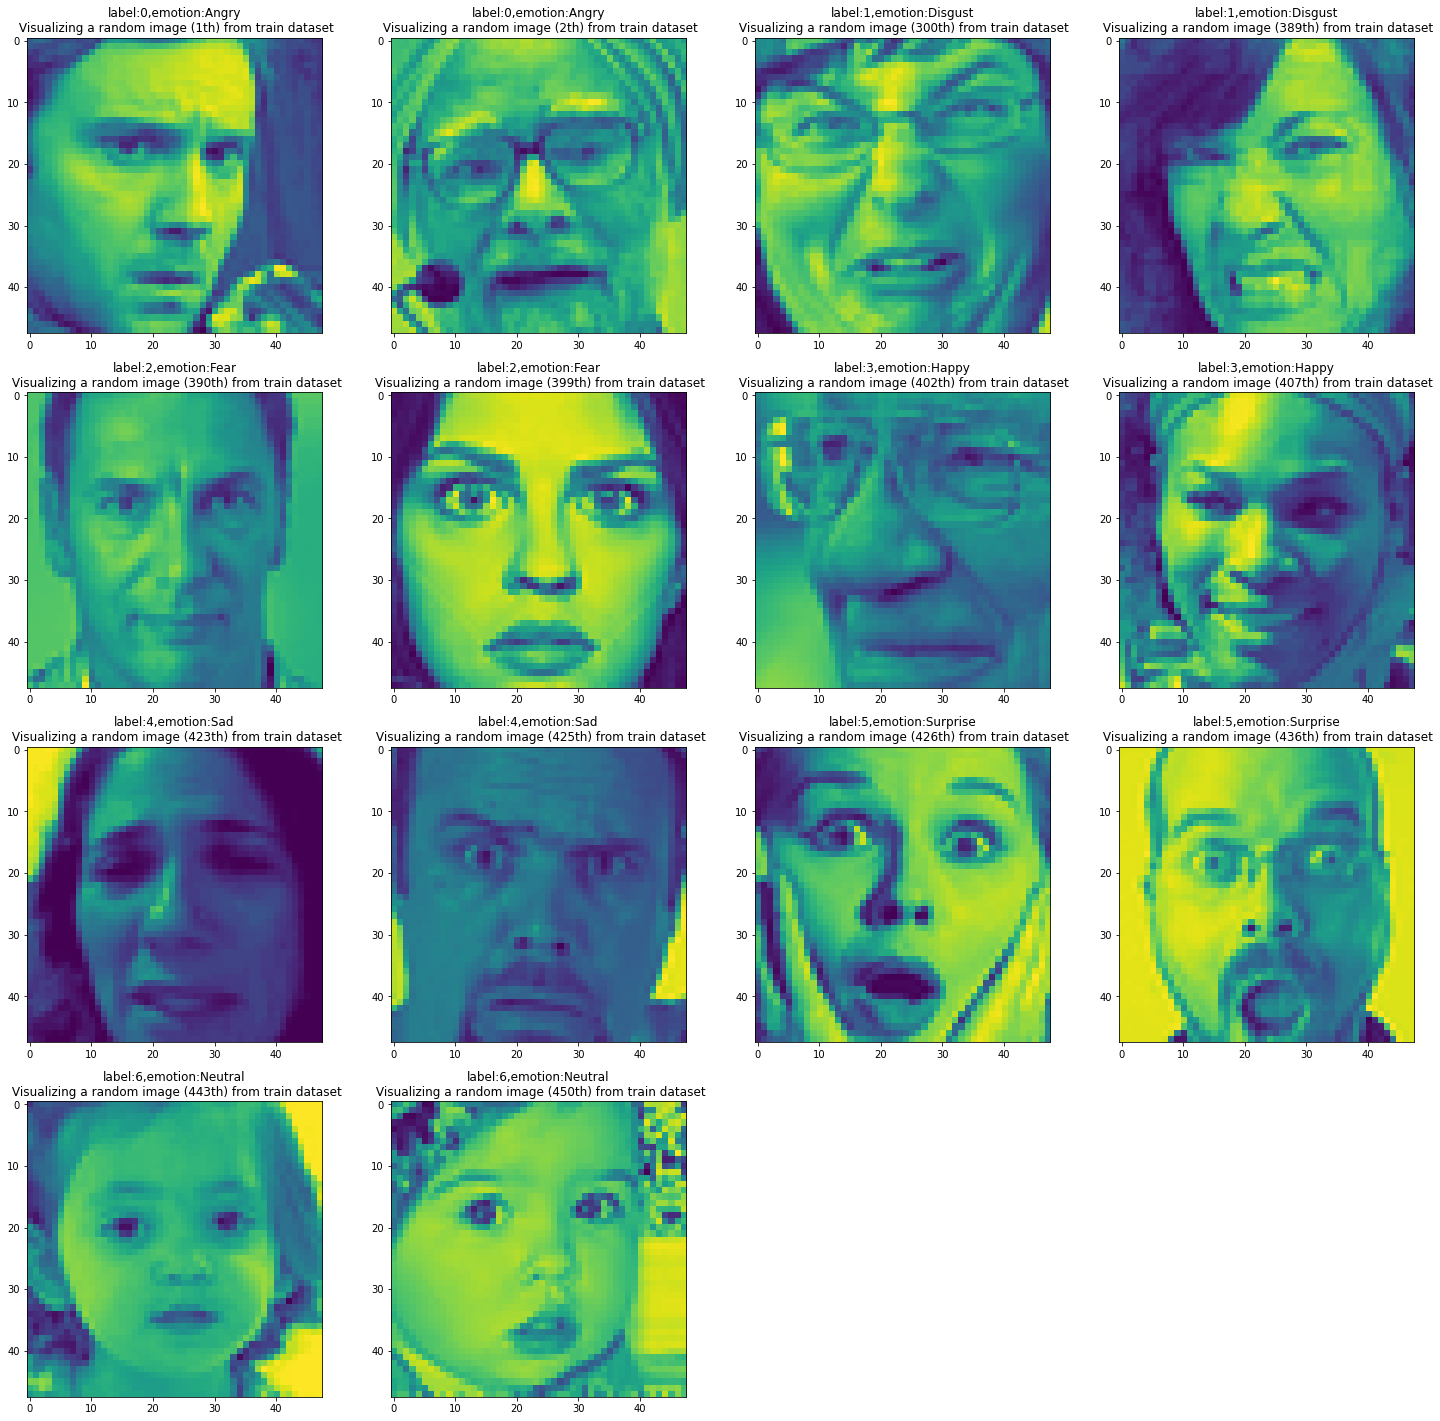

In [6]:
# Preprocessing: Normalize the images.
#train_image = (train_images / 255) - 0.5
#valid_image = (valid_images / 255) - 0.5
#test_image = (test_images / 255) - 0.5
#funcPlot(train_image,train_labels,'train')

# tf.image.per_image_standardization
def np_per_image_standardization(ImageData):
  N = 48*48
  N = 1/np.sqrt(N)
  ImageData = np.array(ImageData,dtype=float)
  for i in range(len(ImageData)):
    mean = np.mean(ImageData[i])
    stddev = np.std(ImageData[i])
    adjusted_stddev = max(stddev,N)
    #image_tep = (ImageData[i] - mean)/adjusted_stddev
    #print(image_tep)
    ImageData[i] = (ImageData[i] - mean)/adjusted_stddev
    #print(ImageData[i])
  return ImageData
#print(np.sqrt(4))    
#print(np.std(train_images[0]))
#print(((train_images[1]-np.mean(train_images[1]))/np.std(train_images[1])))
#print(np_per_image_standardization(train_images[0:2])[1])
train_image = np_per_image_standardization(train_images)
valid_image = np_per_image_standardization(valid_images)
test_image = np_per_image_standardization(test_images)
funcPlot(train_image,train_labels,'train')

# 2(c)

In [16]:
import warnings
warnings.filterwarnings("ignore")  # Ignore some warning logs


from keras.models import Sequential
from keras.layers import Dense, Dropout


#  Define a Feed-Forward Model with 2 hidden layers with dimensions 392 and 196 Neurons
model = Sequential([
  Dense(48*48, activation='relu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(48*48//2, activation='relu', name="second_hidden_layer"), Dropout(0.25),
  Dense(48*48//2//2, activation='relu', input_shape=(48*48,), name="third_hidden_layer"),
  Dense(48*48//2//2, activation='relu', name="fourth_hidden_layer"), Dropout(0.25),
  Dense(48*48//2//2//2, activation='relu', input_shape=(48*48,), name="fifth_hidden_layer"),
  Dense(48*48//2//2//2, activation='relu', name="sixth_hidden_layer"), Dropout(0.25),
  Dense(7, activation='softmax'),
])
#for l in model.layers[0:-3:1]:
#  l.trainable = False

#  Validate your Model Architecture
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_hidden_layer (Dense)   (None, 2304)              5310720   
_________________________________________________________________
second_hidden_layer (Dense)  (None, 1152)              2655360   
_________________________________________________________________
dropout_24 (Dropout)         (None, 1152)              0         
_________________________________________________________________
third_hidden_layer (Dense)   (None, 576)               664128    
_________________________________________________________________
fourth_hidden_layer (Dense)  (None, 576)               332352    
_________________________________________________________________
dropout_25 (Dropout)         (None, 576)               0         
_________________________________________________________________
fifth_hidden_layer (Dense)   (None, 288)              

In [18]:
model.count_params()

9213991

In [11]:
# Compile model
model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

# Flatten the images into vectors (1D) for feed forward network
flatten_train_images = train_image.reshape((-1, 48*48))
flatten_valid_images = valid_image.reshape((-1, 48*48))
flatten_test_images = test_image.reshape((-1, 48*48))
print(train_labels)

#training = model.fit(flatten_train_images, to_categorical(train_labels), epochs=2, batch_size=216,)
#performance = model.evaluate(flatten_test_images, to_categorical(test_labels))
##print(performance)
#print("Accuracy on Test samples: {0}, loss:{1}".format(performance[1],performance[0]))
#print("Accuracy on Train samples: {1}, loss:{0}".format(training.history['loss'][-1],training.history['accuracy'][-1]))
# Train model
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []
#test_loss = []
#test_acc = []
for _ in range(40):
  training = model.fit(flatten_train_images, to_categorical(train_labels), epochs=2, batch_size=216,)
  performance1 = model.evaluate(flatten_valid_images, to_categorical(valid_labels))
  #performance2 = model.evaluate(flatten_test_images, to_categorical(test_labels))
  train_loss.append(training.history['loss'][-1])
  train_acc.append(training.history['accuracy'][-1])
  valid_loss.append(performance1[0])
  valid_acc.append(performance1[1])
  #test_loss.append(performance2[0])
  #test_acc.append(performance2[1]) 
  print("Accuracy on Train samples: {1}, loss:{0}".format(training.history['loss'][-1],training.history['accuracy'][-1]))
  print("Accuracy on valid samples: {0}, loss:{1}".format(performance1[1],performance1[0]))
  #print("Accuracy on Test samples: {0}, loss:{1}".format(performance2[1],performance2[0]))


[0 0 2 ... 4 0 4]
Epoch 1/2
133/133 [==============================] - 1s 7ms/step - loss: 1.8357 - accuracy: 0.2316
Epoch 2/2
113/113 [==============================] - 0s 2ms/step - loss: 1.7370 - accuracy: 0.3107
Accuracy on Train samples: 0.26058030128479004, loss:1.7847306728363037
Accuracy on valid samples: 0.31067150831222534, loss:1.7370034456253052
Epoch 1/2
133/133 [==============================] - 1s 6ms/step - loss: 1.7458 - accuracy: 0.2879
Epoch 2/2
113/113 [==============================] - 0s 2ms/step - loss: 1.6544 - accuracy: 0.3522
Accuracy on Train samples: 0.3193075358867645, loss:1.7058343887329102
Accuracy on valid samples: 0.35218724608421326, loss:1.6543564796447754
Epoch 1/2
133/133 [==============================] - 1s 6ms/step - loss: 1.6732 - accuracy: 0.3377
Epoch 2/2
113/113 [==============================] - 0s 2ms/step - loss: 1.6149 - accuracy: 0.3689
Accuracy on Train samples: 0.35215437412261963, loss:1.645944356918335
Accuracy on valid samples: 0.3

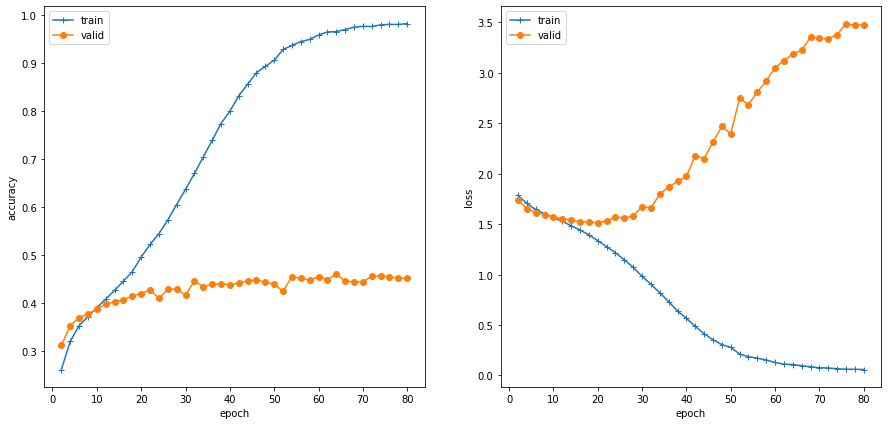

9 0.41850098967552185 1.5140743255615234 0.4951060712337494
31 0.4597380757331848 3.190439224243164 0.9657598733901978


In [15]:

x_aix = np.linspace(2,80,40)
fig = plt.figure(figsize=(15,7))
a = fig.add_subplot(1,2,1)
plt.plot(x_aix,train_acc,'+-',x_aix,valid_acc,'o-')#,x_aix,test_acc,'+-')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','valid'])#,'test'])

a = fig.add_subplot(1,2,2)
plt.plot(x_aix,train_loss,'+-',x_aix,valid_loss,'o-')#,x_aix,test_loss,'+-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])#,'test'])

plt.show()
print(np.argmin(valid_loss),valid_acc[np.argmin(valid_loss)],np.min(valid_loss),train_acc[np.argmin(valid_loss)])
print(np.argmax(valid_acc),np.max(valid_acc),valid_loss[np.argmax(valid_acc)],train_acc[np.argmax(valid_acc)])

In [18]:
model_new = Sequential([
  Dense(48*48, activation='relu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(48*48//2, activation='relu', name="second_hidden_layer"), Dropout(0.25),
  Dense(48*48//2//2, activation='relu', input_shape=(48*48,), name="third_hidden_layer"),
  Dense(48*48//2//2, activation='relu', name="fourth_hidden_layer"), Dropout(0.25),
  Dense(48*48//2//2//2, activation='relu', input_shape=(48*48,), name="fifth_hidden_layer"),
  Dense(48*48//2//2//2, activation='relu', name="sixth_hidden_layer"), Dropout(0.25),
  Dense(7, activation='softmax'),
])

model_new.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

# Flatten the images into vectors (1D) for feed forward network
flatten_train_image = np.vstack([flatten_train_images,flatten_valid_images])
#print(flatten_train_image.shape)
train_label = np.hstack([train_labels,valid_labels])
#print(train_label.shape)
flatten_test_images = test_image.reshape((-1, 48*48))
#print(train_labels)

# Train model
train_loss = []
train_acc = []
test_loss = []
test_acc = []
for _ in range(31):
  training = model_new.fit(flatten_train_image, to_categorical(train_label), epochs=2, batch_size=216,)
  performance = model_new.evaluate(flatten_test_images, to_categorical(test_labels))
  train_loss.append(training.history['loss'][-1])
  train_acc.append(training.history['accuracy'][-1])
  test_loss.append(performance[0])
  test_acc.append(performance[1]) 
  print("Accuracy on Train samples: {1}, loss:{0}".format(training.history['loss'][-1],training.history['accuracy'][-1]))
  print("Accuracy on Test samples: {0}, loss:{1}".format(performance[1],performance[0]))

Epoch 1/2
150/150 [==============================] - 1s 7ms/step - loss: 1.8247 - accuracy: 0.2394
Epoch 2/2
113/113 [==============================] - 0s 2ms/step - loss: 1.7190 - accuracy: 0.3193
Accuracy on Train samples: 0.2713790237903595, loss:1.774610161781311
Accuracy on Test samples: 0.3193089962005615, loss:1.7190378904342651
Epoch 1/2
150/150 [==============================] - 1s 6ms/step - loss: 1.7247 - accuracy: 0.3099
Epoch 2/2
113/113 [==============================] - 0s 2ms/step - loss: 1.6334 - accuracy: 0.3670
Accuracy on Train samples: 0.33339524269104004, loss:1.6812474727630615
Accuracy on Test samples: 0.36695459485054016, loss:1.6334455013275146
Epoch 1/2
150/150 [==============================] - 1s 6ms/step - loss: 1.6504 - accuracy: 0.3518
Epoch 2/2
113/113 [==============================] - 0s 3ms/step - loss: 1.5975 - accuracy: 0.3912
Accuracy on Train samples: 0.358288437128067, loss:1.631508469581604
Accuracy on Test samples: 0.3911953270435333, loss:1.5

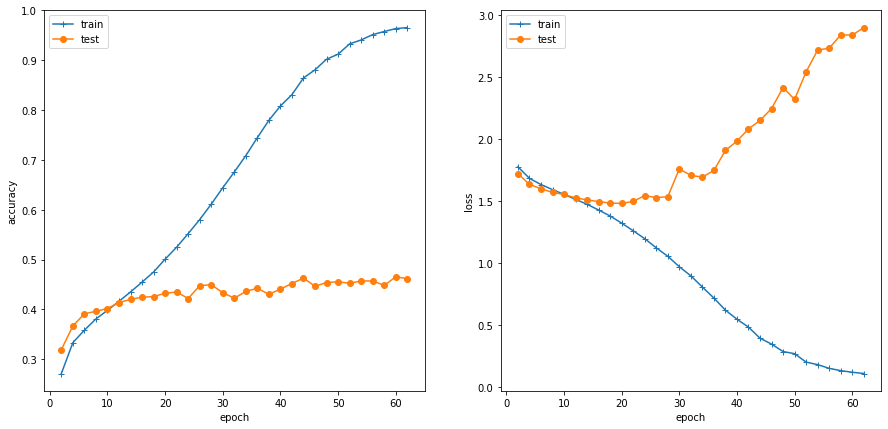

[0.3193089962005615, 0.36695459485054016, 0.3911953270435333, 0.396210640668869, 0.4017832279205322, 0.41376426815986633, 0.4201727509498596, 0.4243521988391876, 0.4257453382015228, 0.4324324429035187, 0.4349400997161865, 0.4218445122241974, 0.4477570354938507, 0.4494287967681885, 0.4335469603538513, 0.4224017858505249, 0.43605461716651917, 0.44246307015419006, 0.4302034080028534, 0.4407913088798523, 0.4519364833831787, 0.4628030061721802, 0.4463638961315155, 0.45388686656951904, 0.45528003573417664, 0.45249372720718384, 0.4569517970085144, 0.45723041892051697, 0.44803565740585327, 0.465310662984848, 0.46168848872184753]
[1.7190378904342651, 1.6334455013275146, 1.5975210666656494, 1.5682164430618286, 1.5512404441833496, 1.523903727531433, 1.5077056884765625, 1.4939343929290771, 1.4823909997940063, 1.4791628122329712, 1.4955881834030151, 1.5423645973205566, 1.5266032218933105, 1.533098816871643, 1.7575103044509888, 1.7049777507781982, 1.6916627883911133, 1.7452186346054077, 1.9069114923

In [21]:
x_aix = np.linspace(2,62,31)
fig = plt.figure(figsize=(15,7))
a = fig.add_subplot(1,2,1)
plt.plot(x_aix,train_acc,'+-',x_aix,test_acc,'o-')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

a = fig.add_subplot(1,2,2)
plt.plot(x_aix,train_loss,'+-',x_aix,test_loss,'o-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])

plt.show()
print(test_acc)
print(test_loss)
print(test_acc[-1],test_loss[-1],train_acc[-1],train_loss[-1])

# 2(d)

In [22]:
from keras.layers import Conv2D, Flatten, MaxPooling2D
from keras.optimizers import SGD



# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(8, kernel_size=3, activation='relu', input_shape=(48,48,1),padding='same'), 
            Conv2D(32, kernel_size=3, activation='relu', input_shape=(48,48,1),padding ='same'), 
            Conv2D(64, kernel_size=3, activation='relu',padding='same'), 
            MaxPooling2D(pool_size=(2,2)),         
            Conv2D(128, kernel_size=3, activation='relu',padding='same'),
            Conv2D(128, kernel_size=3, activation='relu',padding='same'), 
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(256, kernel_size=3, activation='relu',padding='same'),
            Conv2D(256, kernel_size=3, activation='relu',padding='same'), 
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier = [Dense(48*48, activation='relu'),
              Dense(48*48//2, activation='relu'),
              Dense(48*48//2//2, activation='relu'),
              Dense(48*48//2//2//2, activation='relu'),
              Dense(48*48//2//2//2//2, activation='relu'),
              Dense(7, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)
opt = SGD(lr=0.01, momentum=0.9, decay=0.01)
print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'],)
#cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_images_3d = train_image.reshape(-1,48,48,1)
valid_images_3d = valid_image.reshape(-1,48,48,1)
test_images_3d = test_image.reshape(-1,48,48,1)


train_loss = []
train_acc = []
valid_loss = []
valid_acc = []
for _ in range(40):
  training = cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=2, batch_size=400,)#256,)
  performance = cnn_model.evaluate(valid_images_3d, to_categorical(valid_labels))
  train_loss.append(training.history['loss'][-1])
  train_acc.append(training.history['accuracy'][-1])
  valid_loss.append(performance[0])
  valid_acc.append(performance[1]) 
  print("Accuracy on Train samples: {1}, loss:{0}".format(training.history['loss'][-1],training.history['accuracy'][-1]))
  print("Accuracy on valid samples: {0}, loss:{1}".format(performance[1],performance[0]))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        2336      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)      

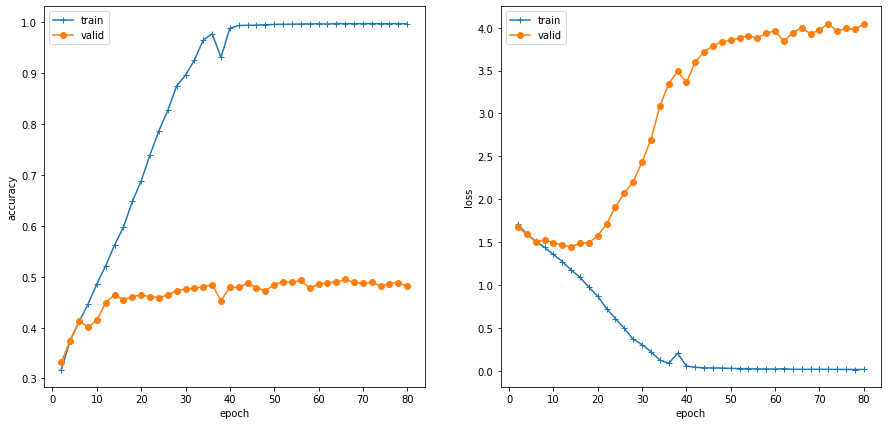

6 0.4641961455345154 1.440698504447937 0.562297523021698
32 0.49456673860549927 3.9997098445892334 0.9969695806503296


In [23]:
x_aix = np.linspace(2,80,40)
fig = plt.figure(figsize=(15,7))
a = fig.add_subplot(1,2,1)
plt.plot(x_aix,train_acc,'+-',x_aix,valid_acc,'o-')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','valid'])

a = fig.add_subplot(1,2,2)
plt.plot(x_aix,train_loss,'+-',x_aix,valid_loss,'o-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])

plt.show()
#print(test_acc)
#print(test_loss)
#print(test_acc[-1],test_loss[-1],train_acc[-1],train_loss[-1])
print(np.argmin(valid_loss),valid_acc[np.argmin(valid_loss)],np.min(valid_loss),train_acc[np.argmin(valid_loss)])
print(np.argmax(valid_acc),np.max(valid_acc),valid_loss[np.argmax(valid_acc)],train_acc[np.argmax(valid_acc)])

In [24]:
# Define 2 groups of layers: features layer (convolutions) and classification layer
common_features = [Conv2D(8, kernel_size=3, activation='relu', input_shape=(48,48,1),padding='same'), 
            Conv2D(32, kernel_size=3, activation='relu', input_shape=(48,48,1),padding ='same'), 
            Conv2D(64, kernel_size=3, activation='relu',padding='same'), 
            MaxPooling2D(pool_size=(2,2)),         
            Conv2D(128, kernel_size=3, activation='relu',padding='same'),
            Conv2D(128, kernel_size=3, activation='relu',padding='same'), 
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(256, kernel_size=3, activation='relu',padding='same'),
            Conv2D(256, kernel_size=3, activation='relu',padding='same'), 
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier = [Dense(48*48, activation='relu'),
              Dense(48*48//2, activation='relu'),
              Dense(48*48//2//2, activation='relu'),
              Dense(48*48//2//2//2, activation='relu'),
              Dense(48*48//2//2//2//2, activation='relu'),
              Dense(7, activation='softmax'),]

cnn_model = Sequential(common_features+classifier)
opt = SGD(lr=0.01, momentum=0.9, decay=0.01)
print(cnn_model.summary())  # Compare number of parameteres against FFN
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'],)
#cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

#train_images_3d = train_image.reshape(-1,48,48,1)
#valid_images_3d = valid_image.reshape(-1,48,48,1)
train_images_new_3d = np.vstack([train_images_3d,valid_images_3d])
train_labels_new = np.hstack([train_labels,valid_labels])

#test_images_3d = test_image.reshape(-1,48,48,1)


train_loss = []
train_acc = []
test_loss = []
test_acc = []
for _ in range(32):
  training = cnn_model.fit(train_images_new_3d, to_categorical(train_labels_new), epochs=2, batch_size=400,)#256,)
  performance = cnn_model.evaluate(test_images_3d, to_categorical(test_labels))
  train_loss.append(training.history['loss'][-1])
  train_acc.append(training.history['accuracy'][-1])
  test_loss.append(performance[0])
  test_acc.append(performance[1]) 
  print("Accuracy on Train samples: {1}, loss:{0}".format(training.history['loss'][-1],training.history['accuracy'][-1]))
  print("Accuracy on test samples: {0}, loss:{1}".format(performance[1],performance[0]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 8)         80        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 32)        2336      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 128)      

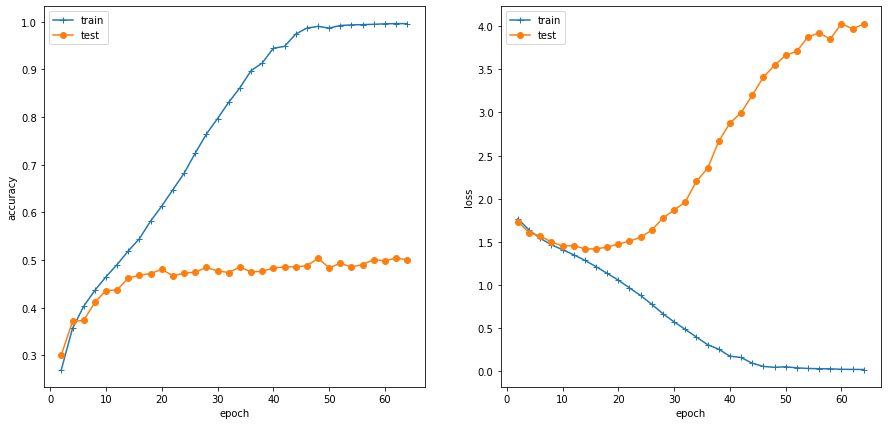

[0.30147674679756165, 0.3711340129375458, 0.37336304783821106, 0.4112566113471985, 0.43605461716651917, 0.43744775652885437, 0.46224576234817505, 0.4680969715118408, 0.4717191457748413, 0.48063528537750244, 0.4669824540615082, 0.4725550413131714, 0.47478407621383667, 0.4845360815525055, 0.4772917330265045, 0.4739481806755066, 0.48537197709083557, 0.4753413200378418, 0.4761772155761719, 0.4837001860141754, 0.48537197709083557, 0.48620784282684326, 0.4878796339035034, 0.5037614703178406, 0.48397883772850037, 0.49317359924316406, 0.48565059900283813, 0.49066591262817383, 0.5009751915931702, 0.4984675347805023, 0.5043187737464905, 0.50069659948349]
[1.7334671020507812, 1.6070759296417236, 1.5679211616516113, 1.4994254112243652, 1.4503729343414307, 1.4577628374099731, 1.4190233945846558, 1.418983817100525, 1.438686728477478, 1.4757157564163208, 1.5070191621780396, 1.5543311834335327, 1.6353977918624878, 1.7760283946990967, 1.868485450744629, 1.9624255895614624, 2.202678918838501, 2.35130167

In [25]:
x_aix = np.linspace(2,64,32)
fig = plt.figure(figsize=(15,7))
a = fig.add_subplot(1,2,1)
plt.plot(x_aix,train_acc,'+-',x_aix,test_acc,'o-')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

a = fig.add_subplot(1,2,2)
plt.plot(x_aix,train_loss,'+-',x_aix,test_loss,'o-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])

plt.show()
print(test_acc)
print(test_loss)
print(test_acc[-1],test_loss[-1],train_acc[-1],train_loss[-1])

# 2(e)

In [26]:
pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=878b1be753cf0f48c15eb80ba9baa40380a9651dcf4f9d771e4617a7e85f2e1e
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [30]:
train_images_3d = train_image.reshape(-1,48,48,1)
valid_images_3d = valid_image.reshape(-1,48,48,1)
test_images_3d = test_image.reshape(-1,48,48,1)

def black_box_function(epochs,batch_size,train=True):
  epochs = int(epochs)
  batch_size = int(batch_size)
  # Define 2 groups of layers: features layer (convolutions) and classification layer
  common_features = [Conv2D(8, kernel_size=3, activation='relu', input_shape=(48,48,1),padding='same'), 
            Conv2D(32, kernel_size=3, activation='relu',input_shape=(48,48,1),padding ='same'), 
            Conv2D(64, kernel_size=3, activation='relu',padding='same'), 
            MaxPooling2D(pool_size=(2,2)),         
            Conv2D(128, kernel_size=3, activation='relu',padding='same'),
            Conv2D(128, kernel_size=3, activation='relu',padding='same'), 
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(256, kernel_size=3, activation='relu',padding='same'),
            Conv2D(256, kernel_size=3, activation='relu',padding='same'), 
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
  classifier = [Dense(48*48, activation='relu'),
              Dense(48*48//2, activation='relu'),
              Dense(48*48//2//2, activation='relu'),
              Dense(48*48//2//2//2, activation='relu'),
              Dense(48*48//2//2//2//2, activation='relu'),
              Dense(7, activation='softmax'),]
  cnn_model = Sequential(common_features+classifier)
  opt = SGD(lr=0.01, momentum=0.9, decay=0.01)
  #print(cnn_model.summary())  # Compare number of parameteres against FFN
  cnn_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'],)
  #cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)
  
  if train==True:
    training = cnn_model.fit(train_images_3d, to_categorical(train_labels), epochs=epochs, batch_size=batch_size,)#256,)
    performance = cnn_model.evaluate(valid_images_3d, to_categorical(valid_labels))
    print("Accuracy on Train samples: {1}, loss:{0}".format(training.history['loss'][-1],training.history['accuracy'][-1]))
    print("Accuracy on Valid samples: {0}, loss:{1}".format(performance[1],performance[0]))
  else:
    training = cnn_model.fit(np.vstack([train_images_3d,valid_images_3d]), to_categorical(np.hstack([train_labels,valid_labels])), epochs=epochs, batch_size=batch_size,)#256,)
    performance = cnn_model.evaluate(test_images_3d, to_categorical(test_labels))
    print("Accuracy on Train samples: {1}, loss:{0}".format(training.history['loss'][-1],training.history['accuracy'][-1]))
    print("Accuracy on Test samples: {0}, loss:{1}".format(performance[1],performance[0]))

  return performance[1]

from bayes_opt import BayesianOptimization
pbounds = {'epochs': (10, 80), 'batch_size': (256, 1024)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    verbose=2, # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=1,
)

In [31]:
optimizer.maximize(
    init_points=2,
    n_iter=30,
)

|   iter    |  target   | batch_... |  epochs   |
-------------------------------------------------
Epoch 1/60
50/50 [==============================] - 11s 222ms/step - loss: 1.8569 - accuracy: 0.2499
Epoch 2/60
50/50 [==============================] - 11s 229ms/step - loss: 1.7800 - accuracy: 0.2619
Epoch 3/60
50/50 [==============================] - 12s 240ms/step - loss: 1.7187 - accuracy: 0.3000
Epoch 4/60
50/50 [==============================] - 12s 235ms/step - loss: 1.6843 - accuracy: 0.3253
Epoch 5/60
50/50 [==============================] - 11s 228ms/step - loss: 1.6434 - accuracy: 0.3488
Epoch 6/60
50/50 [==============================] - 11s 223ms/step - loss: 1.6105 - accuracy: 0.3646
Epoch 7/60
50/50 [==============================] - 11s 222ms/step - loss: 1.5757 - accuracy: 0.3842
Epoch 8/60
50/50 [==============================] - 11s 225ms/step - loss: 1.5438 - accuracy: 0.3981
Epoch 9/60
50/50 [==============================] - 11s 228ms/step - loss: 1.5212 - accuracy

In [32]:
print(optimizer.max)# 259 13
for i, res in enumerate(optimizer.res):
    print("Iteration {}: \n\t{}".format(i, res))

{'target': 0.5084981918334961, 'params': {'batch_size': 263.78187032475097, 'epochs': 79.49345176684808}}
Iteration 0: 
	{'target': 0.47979938983917236, 'params': {'batch_size': 576.2728996115768, 'epochs': 60.42271454095107}}
Iteration 1: 
	{'target': 0.4675396978855133, 'params': {'batch_size': 256.0878398597209, 'epochs': 31.163280084228784}}
Iteration 2: 
	{'target': 0.3716912865638733, 'params': {'batch_size': 1022.1363004721713, 'epochs': 11.748165604572037}}
Iteration 3: 
	{'target': 0.5084981918334961, 'params': {'batch_size': 263.78187032475097, 'epochs': 79.49345176684808}}
Iteration 4: 
	{'target': 0.46781831979751587, 'params': {'batch_size': 371.0641362376733, 'epochs': 79.97615470099313}}
Iteration 5: 
	{'target': 0.4641961455345154, 'params': {'batch_size': 821.9773233334838, 'epochs': 80.0}}
Iteration 6: 
	{'target': 0.47283366322517395, 'params': {'batch_size': 266.69967335939464, 'epochs': 78.2628231501518}}
Iteration 7: 
	{'target': 0.39230984449386597, 'params': {'b

In [34]:
black_box_function(optimizer.max['params']['epochs'],optimizer.max['params']['batch_size'],train=False)

Epoch 1/79
123/123 [==============================] - 14s 116ms/step - loss: 1.8253 - accuracy: 0.2509
Epoch 2/79
123/123 [==============================] - 14s 112ms/step - loss: 1.7685 - accuracy: 0.2720
Epoch 3/79
123/123 [==============================] - 14s 110ms/step - loss: 1.7005 - accuracy: 0.3218
Epoch 4/79
123/123 [==============================] - 13s 108ms/step - loss: 1.6460 - accuracy: 0.3528
Epoch 5/79
123/123 [==============================] - 13s 107ms/step - loss: 1.6087 - accuracy: 0.3709
Epoch 6/79
123/123 [==============================] - 13s 107ms/step - loss: 1.5670 - accuracy: 0.3906
Epoch 7/79
123/123 [==============================] - 13s 108ms/step - loss: 1.5322 - accuracy: 0.4057
Epoch 8/79
123/123 [==============================] - 13s 109ms/step - loss: 1.4937 - accuracy: 0.4252
Epoch 9/79
123/123 [==============================] - 13s 109ms/step - loss: 1.4539 - accuracy: 0.4427
Epoch 10/79
123/123 [==============================] - 13s 109ms/step - l

0.49317359924316406

# 2(f)

In [149]:
train_fashion_images_3d = train_images_3d
valid_fashion_images_3d = valid_images_3d
test_fashion_images_3d = test_images_3d

for l in common_features:
  l.trainable = False

print(cnn_model.summary())

cnn_model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'],)

train_loss = []
train_acc = []
test_loss = []
test_acc = []
for _ in range(10):
  training = cnn_model.fit(train_fashion_images_3d, to_categorical(train_labels), epochs=2, batch_size=256,)
  performance = cnn_model.evaluate(test_fashion_images_3d, to_categorical(test_labels))
  train_loss.append(training.history['loss'][-1])
  train_acc.append(training.history['accuracy'][-1])
  test_loss.append(performance[0])
  test_acc.append(performance[1]) 
  print("Accuracy on Train samples: {1}, loss:{0}".format(training.history['loss'][-1],training.history['accuracy'][-1]))
  print("Accuracy on Test samples: {0}, loss:{1}".format(performance[1],performance[0]))


Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_88 (Conv2D)           (None, 48, 48, 8)         80        
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 48, 48, 32)        2336      
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 12, 12, 128)     

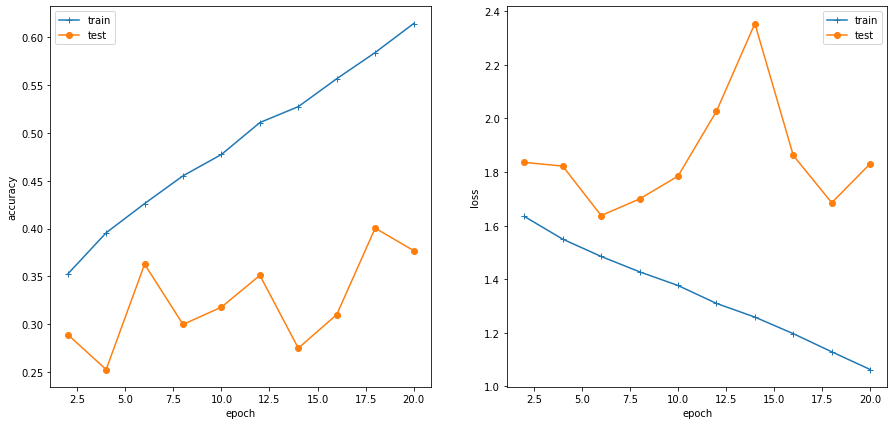

[0.2892170548439026, 0.25271663069725037, 0.36277514696121216, 0.2998049557209015, 0.3179158568382263, 0.3510727286338806, 0.2750069797039032, 0.3101142346858978, 0.400390088558197, 0.37698522210121155]
[1.8356916904449463, 1.821903109550476, 1.637377142906189, 1.6994293928146362, 1.784424066543579, 2.0262598991394043, 2.3534445762634277, 1.861594557762146, 1.6852104663848877, 1.8306745290756226]
0.36277514696121216 1.637377142906189


In [150]:
x_aix = np.linspace(2,20,10)
fig = plt.figure(figsize=(15,7))
a = fig.add_subplot(1,2,1)
plt.plot(x_aix,train_acc,'+-',x_aix,test_acc,'o-')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

a = fig.add_subplot(1,2,2)
plt.plot(x_aix,train_loss,'+-',x_aix,test_loss,'o-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])

plt.show()
print(test_acc)
print(test_loss)
print(test_acc[np.argmin(test_loss)],np.min(test_loss))

In [39]:
import pickle
l = [[0.7,0.8],3.123,56893457]
#l = []
#for i in range(3):
#  l.append([i,i+1])
num_layers = 7
filter_size = 3
stride_size = 1
act_func = 'relu'
dropout_ratio = 0.001
regulaize_ratio = 0.2


In [37]:
import pickle
num_layers = 7
filter_size = 3
stride_size = 1
act_func = 'relu'
dropout_ratio = 0.001
regulaize_ratio = 0.2
with open("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/l{}_f{}_s{}_a{}_d{}_r{}.txt".format(num_layers,
                                                                                                            filter_size,
                                                                                                            stride_size,
                                                                                                            act_func, 
                                                                                                            int(dropout_ratio*1000), 
                                                                                                            int(regulaize_ratio*10)), "rb") as fp:   # Unpickling
  b = pickle.load(fp)
print(b[0])

[0.7, 0.8]


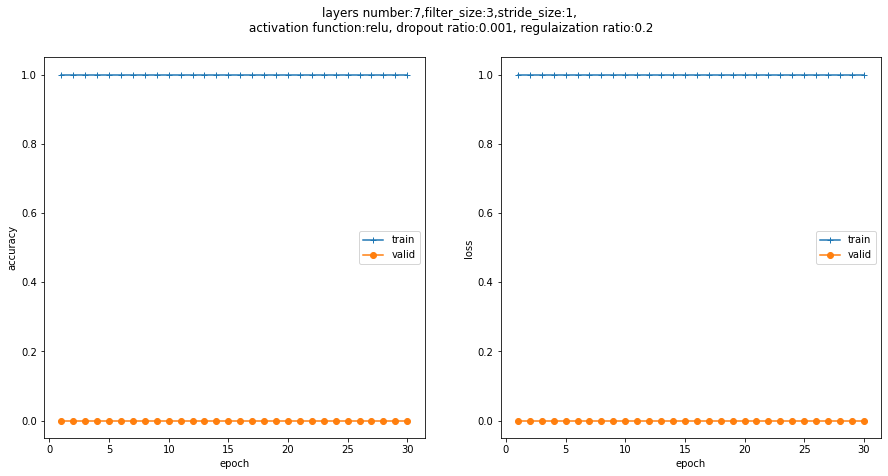

<Figure size 432x288 with 0 Axes>

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def funcPlot_ce_3d(train_acc,valid_acc,train_loss,valid_loss,
                num_layers,filter_size,stride_size,act_func,
                dropout_ratio,regulaize_ratio):
  x_aix = np.linspace(1,30,30)
  fig = plt.figure(figsize=(15,7))
  a = fig.add_subplot(1,2,1)
  plt.plot(x_aix,train_acc,'+-',x_aix,valid_acc,'o-')#,x_aix,test_acc,'+-')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','valid'])#,'test'])
  
  a = fig.add_subplot(1,2,2)
  plt.plot(x_aix,train_loss,'+-',x_aix,valid_loss,'o-')#,x_aix,test_loss,'+-')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','valid'])#,'test'])
  plt.suptitle('layers number:{},filter_size:{},stride_size:{},\n activation function:{}, dropout ratio:{}, regulaization ratio:{}'.format(num_layers,
                                                                                                                            filter_size,
                                                                                                                            stride_size,
                                                                                                                            act_func, 
                                                                                                                            dropout_ratio, 
                                                                                                                            regulaize_ratio))
  plt.show()
  ## creating a image object (main image)  
  #im1 = Image.open(r"/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/download.png")  
  # save a image using extension 
  plt.savefig("/content/drive/My Drive/2020_FALL/CSCE633/HomeWork/HW03/l{}_f{}_s{}_a{}_d{}_r{}.png".format(num_layers,
                                                                                                            filter_size,
                                                                                                            stride_size,
                                                                                                            act_func, 
                                                                                                            int(dropout_ratio*1000), 
                                                                                                            int(regulaize_ratio*10))) 
funcPlot_ce_3d(np.ones(30),np.zeros(30),np.ones(30),np.zeros(30),
                7,3,1,'relu',
                0.001,0.2)